In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [114]:
df = pd.read_csv('immunotherapy.csv')
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,male,22,2.25,14.0,3,51,50,1
1,male,15,3.00,2.0,3,900,70,1
2,male,16,10.50,2.0,1,100,25,1
3,male,27,4.50,9.0,3,80,30,1
4,male,20,8.00,6.0,1,45,8,1


## sex 컬럼의 값들에 따라 sex_encode컬럼에 male이면 0 female이면 1로 바꾸기

In [97]:
df.loc[df['sex'] == 'male', 'sex_encode'] = 0
df.loc[df['sex'] == 'female', 'sex_encode'] = 1
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,sex_encode
0,male,22,2.25,14.0,3,51,50,1,0.0
1,male,15,3.00,2.0,3,900,70,1,0.0
2,male,16,10.50,2.0,1,100,25,1,0.0
3,male,27,4.50,9.0,3,80,30,1,0.0
4,male,20,8.00,6.0,1,45,8,1,0.0


## age 컬럼 수정하기

In [98]:
df['age'].unique()

array(['22', '15', '16', '27', '20', '35', '28', '19', '32', 'a', '17',
       '33', '26', '23', '25', '24', '34', '38', '48', '41', '29', '45',
       '49', '21', '51', '36', '52', '54', '47', '53', '56', '43', '18',
       '46', '30', '42', '40'], dtype=object)

In [117]:
# mean_age = df.loc[df['age'] != 'a', 'age'].astype(np.int64).mean()
# type conversion 안하면 이상한 값
mean_age = df.loc[df['age'].apply(lambda x: x.isdigit()), 'age'].astype(np.int64).mean()
round(mean_age, 1)


30.8

In [118]:
df.loc[df['age'].apply(lambda x: not x.isdigit()), 'age'] = mean_age

In [41]:
df['age'] = df['age'].astype(np.int64)

## Number_of_Warts 컬럼 수정하기

In [42]:
df['Number_of_Warts'].unique()

array([14.,  2.,  9.,  6.,  3.,  4., nan,  1., 12.,  7., 10., 19., 18.,
       11.,  5., 13.,  8.])

In [43]:
mean_num_warts = df.loc[df['Number_of_Warts'].notnull(), 'Number_of_Warts'].mean()
mean_num_warts

6.024096385542169

In [44]:
df['Number_of_Warts'].fillna(mean_num_warts, inplace=True)

## 모델 돌려보기

In [50]:
from sklearn.model_selection import train_test_split

X = df[['sex_encode', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area', 'induration_diameter']]
y = df['Result_of_Treatment']

## 1. KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
import mglearn

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)
print(X_train.shape)
print(y_train.shape)

(67, 7)
(67,)


In [71]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 15)

In [72]:
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

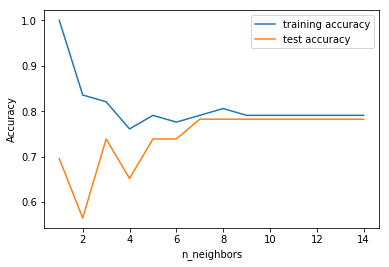

In [73]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

## 2. Linear Regression ㅎ.ㅎ

In [62]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.10
Test set score: 0.25


## 3. Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [83]:
lor = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lor.score(X_test, y_test)))

Training set score: 0.85
Test set score: 0.83


In [84]:
log_reg = LogisticRegression(solver='liblinear', random_state=42).fit(X_train, y_train)
print("Training set score: {:.2f}".format(log_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(log_reg.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.78


## 4. SVM

In [89]:
from sklearn.svm import LinearSVC

In [91]:
clf = LinearSVC().fit(X_train, y_train)
print("Training set score: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.78


In [94]:
clf = LinearSVC().fit(X_train, y_train)
print("Training set score: {:.2f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.78
